![CDS 411 logo](../../img/cds-411-logo.png)

# Class 18: Monte Carlo simulations I

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

In [1]:
%matplotlib inline

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

np.random.seed(14234)

## Random numbers

### Overview

Random numbers are essential for computer simulations of real-life events, such as weather or nuclear reactions. To pick the next weather or nuclear event, the computer generates a sequence of numbers, called **random numbers** or **pseudorandom numbers**.

*   As discussed in *Module 9.2: Simulations* in your textbook, an algorithm actually produces the numbers. 

*   They are not really random, but appear to be random. 

*   A uniform random number generator produces numbers in a **uniform distribution** with each number having an equal likelihood of being anywhere within a specified range.

For example, suppose we wish to generate a sequence of uniformly distributed, four-digit random integers.  The algorithm used to accomplish this should, in the long run, produce approximately as many numbers between, say, 1000 and 2000 as it does between 8000 and 9000.

> ***Definition***
>
> **Pseudorandom numbers** (also called **random numbers**) are a sequence of numbers that an algorithm produces but which appear to be generated randomly.  The sequence of random numbers is **uniformly distributed** if each random number has an equal likelihood of being anywhere within a specified range.

## Random numbers using the `numpy` module

### Uniform distribution of floats

The `numpy` module has an [ensemble of random number generator routines](https://docs.scipy.org/doc/numpy/reference/routines.random.html) that are quite useful.

*   The uniform random number generator is provided by the function `np.random.uniform()`.

The simplest way to use it is to give it a single argument, specifying how many random numbers you want using the `size` parameter. That way, each call to `np.random.uniform` returns a vector of uniformly distributed pseudorandom floating point numbers between 0 and 1.  Evaluate the following commands several times to observe the generation of different random numbers:

In [2]:
np.random.uniform(size=1)

array([0.31758847])

In [3]:
np.random.uniform(size=5)

array([0.68168571, 0.76585959, 0.68450908, 0.57855728, 0.773761  ])

In [4]:
np.random.uniform(size=10)

array([0.1990609 , 0.62125217, 0.69300428, 0.51733964, 0.76369778,
       0.63150697, 0.20096115, 0.52575685, 0.92221297, 0.21902962])

Suppose, however, we need our random floating point numbers to be in the range from 2.0 up to 5.0. We can specify `low` and `high` parameters to `np.random.uniform` to get a different range:

In [5]:
np.random.uniform(low=2, high=5, size=10)

array([3.99451505, 2.36326583, 4.30423531, 4.55577852, 3.44023328,
       2.08717776, 2.54533052, 3.10344858, 4.57575228, 4.13391795])

The `size` parameter will also accept a tuple, which we can use to generate a two-dimensional random matrix:

In [6]:
np.random.uniform(low=0, high=10, size=(4, 3))

array([[0.97849711, 9.15434153, 2.94958953],
       [9.88098085, 4.32639396, 9.41562831],
       [9.02787087, 2.97336346, 9.75391349],
       [3.05626464, 2.745779  , 4.01571054]])

### Uniform distribution of integers

To obtain an integer random number, we have a couple of different options available to us.
One method is to use the `np.floor()` function in conjunction with `np.random.uniform()`. 
`np.floor()` returns the integer immediately below the floating-point number it is passed as an argument;
for instance `np.floor(6.8)` returns the answer 6.
Thus, the following command returns a random integer from the set {1, 2, ..., 25}:

In [7]:
np.floor(np.random.uniform(low=1, high=26, size=1))

array([23.])

Note that we had to make the max 26 instead of 25, since all floating-point numbers in the range 25.0 to 26.0 will get "floored" to the integer value 25.

Combining these operations, the following commands assign to `matrix_sqr` a \\(4 \times 4\\) array of integers from the set {11, 12, ..., 19} and to `matrix_rect` a \\(2 \times 3\\) array of integers from the same set:

In [8]:
matrix_sqr = np.floor(np.random.uniform(low=11, high=20, size=(4, 4)))
print(matrix_sqr)

[[13. 17. 19. 18.]
 [12. 19. 13. 14.]
 [14. 12. 12. 19.]
 [17. 17. 17. 14.]]


In [9]:
matrix_rect = np.floor(np.random.uniform(low=11, high=20, size=(2, 3)))
print(matrix_rect)

[[19. 13. 15.]
 [18. 15. 11.]]


Alternatively, `numpy` provides the `np.random.randint()` function, which automatically draws integers from a uniform distribution without the need for `np.floor()`:

In [10]:
matrix_sqr_alt = np.random.randint(low=11, high=20, size=(4, 4))
print(matrix_sqr_alt)

[[13 15 13 19]
 [19 17 18 16]
 [18 12 18 12]
 [17 11 14 18]]


In [11]:
matrix_rect_alt = np.random.randint(low=11, high=20, size=(2, 3))
print(matrix_rect_alt)

[[11 17 15]
 [12 17 15]]


### Reproducibility with a random seed

*   A random number generator starts with a number, which we call a seed because all subsequent random numbers sprout from it. 

*   The generator uses the seed in a computation to produce a pseudorandom number.

*   The algorithm employs that value as the seed in the computation of the next random number, and so on.

*   Typically, we seed the random number generator once at the beginning of a program.

For example, we seed the random number generator with 14234 as follows:

```r
np.random.seed(14234)
```

*   If the random number generator always starts with the same seed, it always produces the same sequence of numbers.

*   A program using this generator performs the same steps with each execution.

*   The ability to reproduce detected errors is useful when debugging a program.

*   However, this replication is not desirable when you start running simulations with different inputs. For example, if we have a computer simulation of weather, we do not want the program always to start with a thunderstorm.

*   By default, if the seed is not set, the `numpy` module initializes it to something different every time you run your program.

## Modulus function

An algorithm for a random number generator often employs the modulus operator, `%` in Python, which gives the remainder of a first integer argument divided by a second integer argument.  To return the remainder of the division of $m\times{}n$, we employ a command of the following form:

```python
m % n
```

You may notice that this call looks exactly like it does in C, C++, and Java. Thus, the following statement returns 3, the remainder of 23 divided by 4.

In [12]:
23 % 4

3

## Statistical measures

The function `np.mean` returns the arithmetic mean, or average, of the elements in an array and has the following format:

```python
np.mean(vector)
```

Similarly, `np.std` returns the standard deviation of the elements in an array.  The following segment creates an array of 10 floating point numbers in the range 6 to 12 and returns the mean and standard deviation:

In [13]:
array_for_stats = np.random.uniform(low=6, high=12, size=10)

In [14]:
print(np.mean(array_for_stats))

8.560442666306956


In [15]:
print(np.std(array_for_stats))

1.9799999489244051


## Histograms

A histogram of a data set is a bar chart where the base of each bar is an interval of data values and the height of this bar is the number of data values in that interval. For example, the histogram of the array `array_to_plot = np.array([1, 15, 20, 1, 3, 11, 6, 5, 10, 13, 20, 14, 24])` is given by the code below. As we've been doing all semester, we continue to use `pandas` to make our life easier.

In [16]:
array_to_plot = np.array([1, 15, 20, 1, 3, 11, 6, 5, 10, 13, 20, 14, 24])
df = pd.DataFrame(data=array_to_plot, columns=["my numbers"])

Let's check that the data frame was set up correctly:

In [17]:
df

,my numbers
0,1
1,15
2,20
3,1
4,3
5,11
6,6
7,5
8,10
9,13


So now that we have our data frame, how do we create a histogram? First, we need to create a figure object and an axes object that stores subfigures, then we access the `"my numbers"` column and run the method `hist()`, making use of a couple of other parameters,

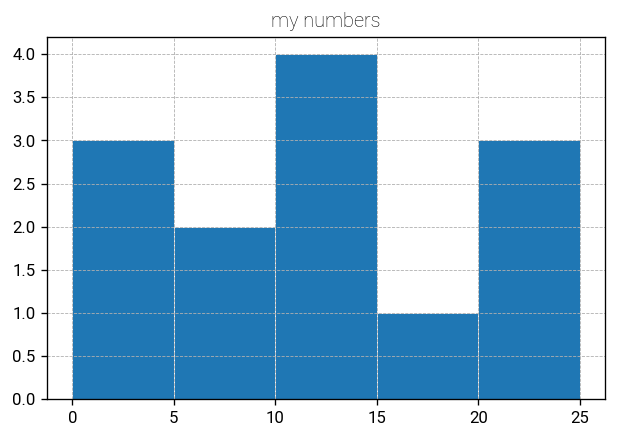

In [18]:
fig, ax = plt.subplots(dpi=120)
df[["my numbers"]].hist(bins=5, range=(0,25), ax=ax, linewidth=0.5, edgecolor='w');

The `bins` parameter specifies the number of bins (or buckets) used to create the histogram.
The `range` parameter corrects the numerical range over which we should create the `bins`.
The `ax` parameter was the axes object we instantiated earlier, and specifying it here lets `pandas` know to use the `matplotlib` subplot environment within our `fig` object when creating the histogram.

In the figure, the 13 data values are split into five intervals or categories: [0, 5), [5, 10), [10, 15), [15, 20), [20, 25). The interval notation, such as [10, 15), is the set of numbers between the endpoints 10 and 15, including the value with the square bracket (10) but not the value with the parenthesis (15).  Thus, for a number x in [10, 15), we have 10 ≤ x < 15.  Because four data values (10, 11, 13, 14) appear in this interval, the height of that bar is 4.

> ***Definition***
>
> A **histogram** of a data set is a bar chart where the base of each bar is an interval of data values and the height of this bar is the number of data values in that interval.

Since we've been increasingly making use of `seaborn`, you may also use:

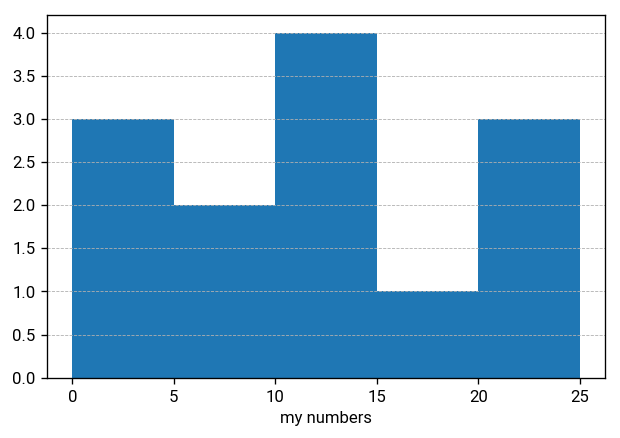

In [19]:
fig, ax = plt.subplots(dpi=120)
sns.distplot(a=df["my numbers"], kde=False, bins=5, hist_kws={"range": (0, 25), "alpha": 1}, ax=ax);

As another example, we generate an array, `normal_array`, with 10,000 normally distributed random values.
The commands to generate the table and produce a histogram with 30 categories are as follows:

In [20]:
normal_array = np.random.normal(size=10000)
df2 = pd.DataFrame(data=normal_array, columns=["x"])

Using `seaborn`, we would write:

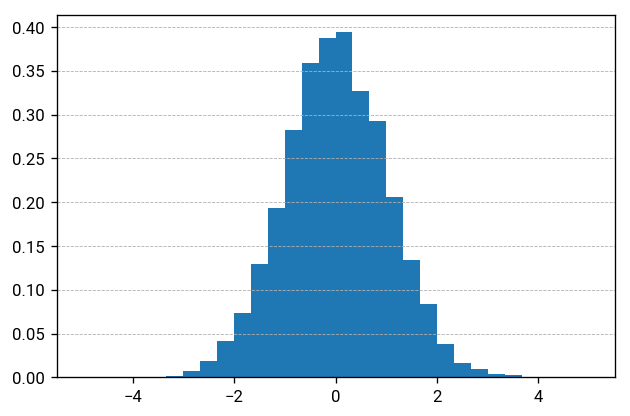

In [21]:
fig, ax = plt.subplots(dpi=120)
sns.distplot(a=(df2["x"],), bins=30, hist_kws={"range": (-5, 5), "alpha": 1.0},
             kde=False, norm_hist=True, ax=ax);

The keyword `norm_hist=True` normalizes the histogram so that the area within the bars sums to 1.

If you use `kde=True` (which is the default), then you can also see the density plot for the histogram. If you use this, then the `norm_hist` keyword is no longer necessary:

/home/jglasbr2/.conda/envs/cds411-dev/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


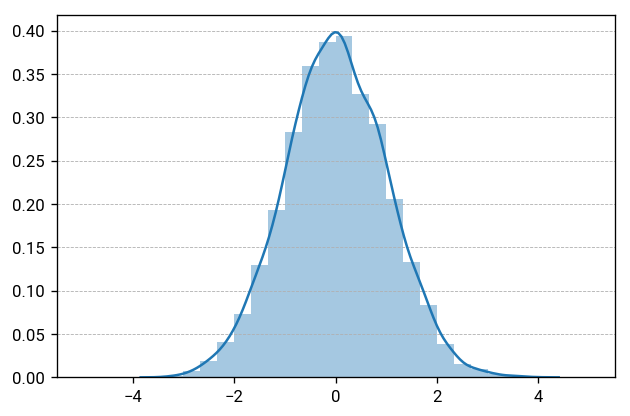

In [22]:
fig, ax = plt.subplots(dpi=120)
sns.distplot(a=(df2["x"],), bins=30, hist_kws={"range": (-5, 5)}, ax=ax);

## Convenience methods for data frames

In addition to making it easier to generate plots, `pandas` is quite nice to use for computing summary statistics.
We can take `array_for_stats` from earlier in the notebook, put it in a data frame, and compute the mean and standard deviation just as easily,

In [23]:
df_for_stats = pd.DataFrame(data=array_for_stats, columns=["x"])

print(df_for_stats.mean())
print(df_for_stats.std())

x    8.560443
dtype: float64
x    2.087103
dtype: float64


In fact, we can calculate several summary statistics with a single method!

In [24]:
df_for_stats.describe()

,x
count,10.000000
mean,8.560443
std,2.087103
min,6.090413
25%,6.933153
50%,7.830375
75%,10.439608
max,11.527838


We'll find that `pandas` can be quite useful when analyzing our simulation results.

## Element of Chance

We'll consider the function $y(x)=-1.75x^2+x^3+1.4$ for this example.
Numpy doesn't allow for symbolic mathematics, so we need to specify the function numerically.
The vectorization features of `numpy` make this pretty easy to do.
We specify our range of values for our independent variable \\(x\\) using the `np.linspace()` function and store it in the variable `x`, and then type out the above formula using `x` where necessary:

In [25]:
def cubic_function(x, a=1.4, b=0, c=-1.75, d=1.0):
    return a + b * x + c * x**2 + d * x**3

We form our data frame:

In [26]:
x = np.linspace(start=0, stop=2.0, num=200)
df = pd.DataFrame({
    "x": x,
    "y": cubic_function(x),
    "category": "function",
})

We visualize the cubic function using `seaborn`:

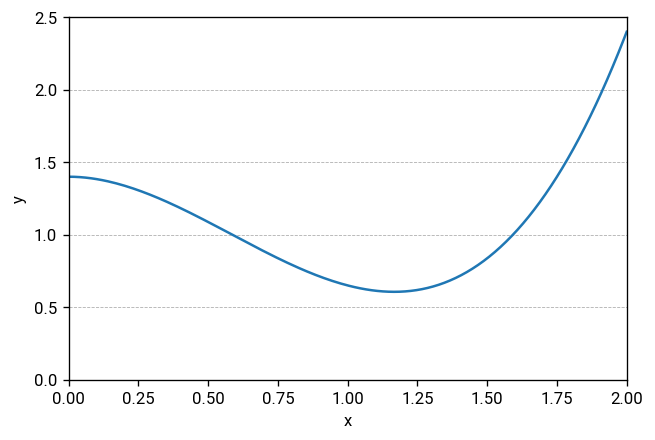

In [27]:
fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="x", y="y", data=df, ax=ax);
ax.set_xlim([0, 2.0])
ax.set_ylim([0, 2.5]);

Now let's implement our dart throwing Monte Carlo simulation to calculate the area under the curve. The area under the curve is approximately equal to

\begin{equation}
  \text{area}\approx{}\left(\text{area of enclosing rectangle}\right)\left(\frac{\text{number of darts below}}{\text{number of darts}}\right)
\end{equation}

We implement a function to throw the darts:

In [28]:
def throw_darts(number_of_darts, x_min, x_max, y_min, y_max):
    return pd.DataFrame({
        "darts_x": np.random.uniform(low=x_min, high=x_max, size=number_of_darts),
        "darts_y": np.random.uniform(low=y_min, high=y_max, size=number_of_darts),
    })

Next a function to test whether the darts are above the curve:

In [29]:
def test_darts(darts_df):
    return darts_df["darts_y"] < cubic_function(darts_df["darts_x"].values)

Then a function to estimate the area under the curve:

In [30]:
def estimate_area_under_curve(darts_df, x_min, x_max, y_min, y_max):
    success_fraction = np.sum(darts_df["hit"]) / len(darts_df)
    width = x_max - x_min
    height = y_max - y_min
    area = width * height
    area_under_curve = area * success_fraction
    
    return area_under_curve

We run a test of our Monte Carlo integration. We will integrate in the range $0\leq{}x\leq{}2.0$ and $0\leq{}y\leq{}2.5$ using 1000 dart throws.

In [31]:
x_min = 0
x_max = 2.0
y_min = 0
y_max = 2.5
number_of_darts = 1000

We run the methods and save whether or not the dart is a hit or a miss. First, we throw the darts and assign the resulting data frame to `darts_df`:

In [32]:
darts_df = throw_darts(number_of_darts, x_min, x_max, y_min, y_max)

Next we create a column called *hit* detailing whether the dart is a hit or a miss:

In [33]:
darts_df["hit"] = test_darts(darts_df)

The first few rows in the data frame look as follows:

In [34]:
darts_df.head()

,darts_x,darts_y,hit
0,0.940828,1.605624,False
1,0.514035,2.034799,False
2,0.441216,0.909028,True
3,1.636250,1.990111,False
4,1.553756,0.702477,True


Compute the area based on the hits and misses:

In [35]:
area_under_cubic_function = estimate_area_under_curve(darts_df, x_min, x_max, y_min, y_max)
print("Estimated area under curve with 1000 darts =", area_under_cubic_function)

Estimated area under curve with 1000 darts = 2.1


We visualize what the Monte Carlo integration looks like:

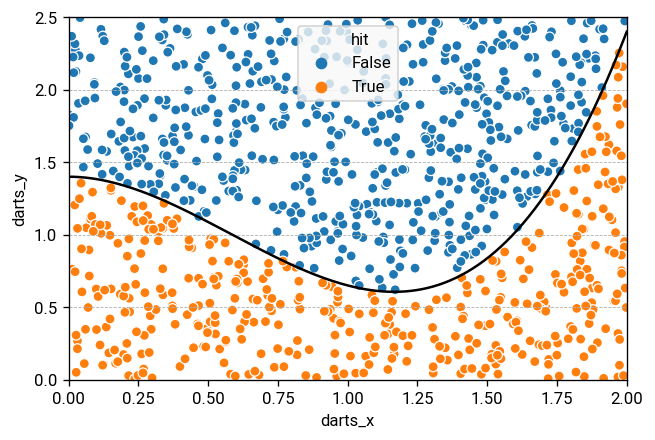

In [36]:
fig, ax = plt.subplots(dpi=120)
sns.lineplot(x="x", y="y", data=df, color="black", ax=ax)
sns.scatterplot(x="darts_x", y="darts_y", hue="hit", data=darts_df, ax=ax)
ax.set_xlim([0, 2.0])
ax.set_ylim([0, 2.5]);

### Exact integration

The accuracy of Monte Carlo integration improves as we increase the number of "darts" thrown at the viewing window.
We can track exactly how much improvement we get by comparing the estimated area with the exact integral of \\(f(x) = -1.75 x^{2} + x^{3} + 1.4\\).
Computing the integral by hand is as follows:

\begin{equation}
  \int_{0}^{2}-1.75x^{2}+x^{3}+1.4dx=\left.-1.75\cdot\dfrac{x^{3}}{3}+\dfrac{x^{4}}{4}+1.4x\right\rvert_{0}^{2}
\end{equation}
\begin{equation}
  = -1.75 \cdot \dfrac{8}{3} + 4 + 1.4 \cdot 2
\end{equation}
\begin{equation}
  = - \dfrac{7}{4} \cdot \dfrac{8}{3} + 4 + \dfrac{14}{10} \cdot 2
\end{equation}
\begin{equation}
  = \dfrac{32}{15}
\end{equation}
\begin{equation}
  \approx 2.133333
\end{equation}

If we wanted to compute the exact integral in Python, then we could use the precise integration methods available in the `scipy.integrate` module, [see here for an overview](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). The general purpose integration function is `quad()`, [see the documentation for additional details](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html). To use `quad()`, we run:

In [37]:
exact_area_numerical = scipy.integrate.quad(func=cubic_function, a=0, b=2)
print("exact area =", exact_area_numerical[0])
print("Upper bound on numerical error =", exact_area_numerical[1])

exact area = 2.1333333333333333
Upper bound on numerical error = 2.3684757858670007e-14
